In [ ]:
import pandas as pd

# Create dataset
weather = {
    'weather': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temp': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

weather_df = pd.DataFrame(weather)

display(weather_df)

In [ ]:
from sklearn import preprocessing

# Create label encoder
le = preprocessing.LabelEncoder()

# Convert string labels into numbers.
weather_df['weather'] = le.fit_transform(weather_df['weather'])
weather_df['temp'] = le.fit_transform(weather_df['temp'])
weather_df['play'] = le.fit_transform(weather_df['play'])

display(weather_df)


In [ ]:
features = weather_df[['weather', 'temp']]
target = weather_df['play']

from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB()

model.fit(features, target)

In [ ]:
print(model.predict([[0, 2]]))

# Exercice 1

In [ ]:
blood = pd.read_csv('blood_transfusion.csv', sep=",")

display(blood.head())

In [ ]:
le = preprocessing.LabelEncoder()

blood["Class"] = le.fit_transform(blood["Class"])

In [ ]:
import seaborn as sns

def get_n_colors(n):
    s = sns.color_palette(n_colors=n)
    return s.as_hex()


def plot_feature_matrix(target, df):
    color = pd.Series([i for i in target])
    for c, p in zip(get_n_colors(len(set(target))), set(target)):
        color = color.replace(p, c)
    pd.plotting.scatter_matrix(df, color=color, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60)

plot_feature_matrix(blood["Class"], blood.drop("Class", axis=1))


In [ ]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB()

_ = model.fit(blood.drop("Class", axis=1), blood["Class"])

In [ ]:
print(list(blood.columns))
print("prediction pour [0, 50, 1000, 28]:", model.predict([[0, 50, 1000, 28]]))
print("prediction pour [4, 10, 4000, 64]:", model.predict([[4, 10, 4000, 64]]))

# Exercice 2

In [57]:
student = pd.read_csv('StudentsPerformance.csv', sep=",")

display(student.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [66]:
student["mean"] = (student["math score"] + student["reading score"] + student["writing score"]) / 3
student["mean"] = list(map(float, student["mean"]))

<AxesSubplot:xlabel='parental level of education'>

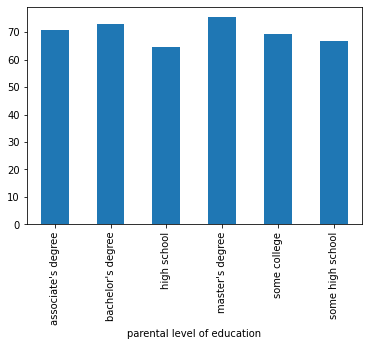

In [52]:
# plot bar diagram of the parental level of education and the mean of the students
student.groupby("parental level of education")["reading score"].mean().plot.bar()


<AxesSubplot:xlabel='test preparation course'>

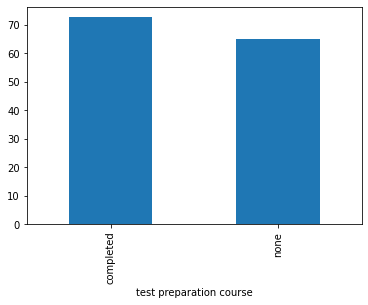

In [53]:
student.groupby("test preparation course")["mean"].mean().plot.bar()

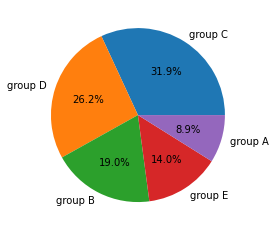

In [54]:
# pie chart of the race/ethnicity of the students
import matplotlib.pyplot as plt

dic = student["race/ethnicity"].value_counts().to_dict()
plt.pie(dic.values(), labels=dic.keys(), autopct='%1.1f%%')
plt.show()

In [59]:
le = preprocessing.LabelEncoder()
for i in ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]:
    student[i] = le.fit_transform(student[i])

In [67]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int32  
 1   race/ethnicity               1000 non-null   int32  
 2   parental level of education  1000 non-null   int32  
 3   lunch                        1000 non-null   int32  
 4   test preparation course      1000 non-null   int32  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean                         1000 non-null   float64
dtypes: float64(1), int32(5), int64(3)
memory usage: 50.9 KB


In [65]:
display(student.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,0,1,1,1,1,72,72,74,<map object at 0x0000018300E0E1D0>
1,0,2,4,1,0,69,90,88,<map object at 0x0000018300E0E1D0>
2,0,1,3,1,1,90,95,93,<map object at 0x0000018300E0E1D0>
3,1,0,0,0,1,47,57,44,<map object at 0x0000018300E0E1D0>
4,1,2,4,1,1,76,78,75,<map object at 0x0000018300E0E1D0>


In [71]:
score = []
for i in student["mean"]:
    if i >= 90:
        score.append(0)
    elif i >= 80:
        score.append(1)
    elif i >= 70:
        score.append(2)
    elif i >= 60:
        score.append(3)
    else:
        score.append(4)

student["score"] = score

In [73]:
model = CategoricalNB()

_ = model.fit(student.drop(["math score", "reading score", "writing score", "mean", "score"], axis=1), student["score"])

# 2. LDA

In [74]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()

df = pd.DataFrame(np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"])
df["species"] = pd.Categorical.from_codes(iris["target"], iris["target_names"])
df.columns = ["s_length", "s_width", "p_length", "p_width", "target", "species"]

X = df[["s_length", "s_width", "p_length", "p_width"]]
y = df["target"]


In [75]:
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)

LDA Summary:
Classes: [0. 1. 2.]
Priors: [0.33333333 0.33333333 0.33333333]
Explained variance ratio: [0.9912126 0.0087874]


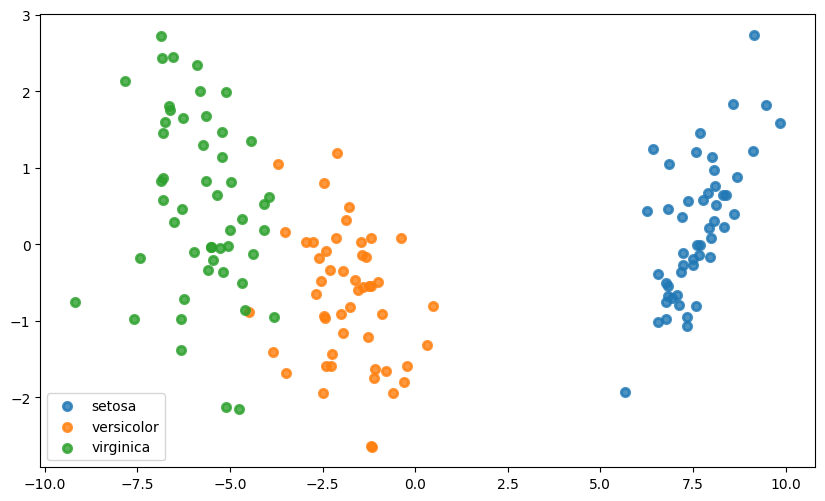

In [76]:
plt.figure(figsize=(10, 6), dpi=100)

for color, i, target_name in zip(get_n_colors(3), [0, 1, 2], iris.target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], color=color, alpha=.8, lw=2, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)

print("LDA Summary:")
print("Classes:", model.classes_)
print("Priors:", model.priors_)
print("Explained variance ratio:", model.explained_variance_ratio_)

plt.show()

# Exercice 2.1

In [78]:
chall = pd.read_csv("lol/Challenger_Ranked_Games.csv", sep=",")

display(chall.head())

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [85]:
for team in ["blue", "red"]:
    idx = chall[chall[f"{team}FirstBlood"] == 1].index
    print(f"{team} Wins with first blood:", chall.loc[idx, f'{team}Wins'].mean())

blue Wins with first blood: 0.6025688344282867
red Wins with first blood: 0.6047508080884011


In [87]:
print("Avg game duration", chall["gameDuraton"].mean())

Avg game duration 1448.6536574487066


# 3. QDA

In [88]:
from sklearn.datasets import fetch_olivetti_faces

faces, labels = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=42)
print(faces.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\leovi\scikit_learn_data
(400, 4096)


In [89]:
print(np.unique(labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.2, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()

lda.fit(X_train, y_train)

print("Classes:", lda.classes_)
print("Priors:", lda.priors_)
print("Explained variance ratio:", lda.explained_variance_ratio_)


Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Priors: [0.025    0.028125 0.028125 0.021875 0.01875  0.025    0.03125  0.021875
 0.021875 0.025    0.028125 0.028125 0.021875 0.025    0.01875  0.028125
 0.025    0.025    0.021875 0.025    0.021875 0.025    0.015625 0.025
 0.028125 0.025    0.028125 0.01875  0.03125  0.025    0.028125 0.021875
 0.028125 0.03125  0.03125  0.025    0.025    0.03125  0.021875 0.01875 ]
Explained variance ratio: [0.18041219 0.1208247  0.08221974 0.06273519 0.05105675 0.04790365
 0.04253825 0.03672382 0.03387299 0.0286964  0.02646573 0.02519402
 0.02466111 0.02262153 0.01907346 0.01681669 0.01608501 0.01542481
 0.01318231 0.01268148 0.01190124 0.01080335 0.00992639 0.00927645
 0.00860248 0.00851856 0.00775119 0.00697468 0.00653183 0.0062031
 0.00566299 0.005482   0.00474469 0.00395664 0.00362231 0.00316972
 0.00282603 0.00252337 0.00233315]


In [91]:
print("Accuracy:", lda.score(X_test, y_test))
print("Number of faces in test dataset:", len(X_test))
print("Number of faces with incorrect prediction:", len(X_test) - lda.score(X_test, y_test) * len(X_test))

Accuracy: 0.9375
Number of faces in test dataset: 80
Number of faces with incorrect prediction: 5.0


In [93]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()

qda.fit(X_train, y_train)

print("Classes:", qda.classes_)
print("Priors:", qda.priors_)

Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Priors: [0.025    0.028125 0.028125 0.021875 0.01875  0.025    0.03125  0.021875
 0.021875 0.025    0.028125 0.028125 0.021875 0.025    0.01875  0.028125
 0.025    0.025    0.021875 0.025    0.021875 0.025    0.015625 0.025
 0.028125 0.025    0.028125 0.01875  0.03125  0.025    0.028125 0.021875
 0.028125 0.03125  0.03125  0.025    0.025    0.03125  0.021875 0.01875 ]


c:\Users\leovi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [94]:
print("Accuracy:", qda.score(X_test, y_test))
print("Number of faces in test dataset:", len(X_test))
print("Number of faces with incorrect prediction:", len(X_test) - qda.score(X_test, y_test) * len(X_test))

Accuracy: 0.0375
Number of faces in test dataset: 80
Number of faces with incorrect prediction: 77.0


# Exercice 3.1

In [95]:
credit = pd.read_csv("creditcard.csv", sep=",")
display(credit.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [124]:

X_train, X_test, y_train, y_test = train_test_split(credit.drop("Class", axis=1), credit["Class"], test_size=.2)

qda = QDA()

qda.fit(X_train, y_train)

print("Classes:", len(qda.classes_))

print("Accuracy:", qda.score(X_test, y_test))
print("Number of rows in test dataset:", len(X_test))
print("Number of incorrect prediction:", len(X_test) - qda.score(X_test, y_test) * len(X_test))

Classes: 2
Accuracy: 0.9739650995400443
Number of rows in test dataset: 56962
Number of incorrect prediction: 1483.0


In [125]:
lda = LDA()

lda.fit(X_train, y_train)

print("Classes:", len(lda.classes_))

print("Accuracy:", lda.score(X_test, y_test))
print("Number of rows in test dataset:", len(X_test))
print("Number of incorrect prediction:", len(X_test) - lda.score(X_test, y_test) * len(X_test))

Classes: 2
Accuracy: 0.9993153330290369
Number of rows in test dataset: 56962
Number of incorrect prediction: 39.0


In [129]:
# test with knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)
print("Accuracy:", score)
print("Number of rows in test dataset:", len(X_test))
print("Number of incorrect prediction:", len(X_test) - score * len(X_test))

Accuracy: 0.9979986657771848
Number of rows in test dataset: 56962
Number of incorrect prediction: 114.0


In [126]:
# test with randomforest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

rf.fit(X_train, y_train)

print("Accuracy:", rf.score(X_test, y_test))
print("Number of rows in test dataset:", len(X_test))
print("Number of incorrect prediction:", len(X_test) - rf.score(X_test, y_test) * len(X_test))

Accuracy: 0.9988939995084443
Number of rows in test dataset: 56962
Number of incorrect prediction: 63.0


In [127]:
# test with logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=3000)

lr.fit(X_train, y_train)

print("Accuracy:", lr.score(X_test, y_test))
print("Number of rows in test dataset:", len(X_test))
print("Number of incorrect prediction:", len(X_test) - lr.score(X_test, y_test) * len(X_test))

Accuracy: 0.9991046662687406
Number of rows in test dataset: 56962
Number of incorrect prediction: 51.0


In [128]:
# test with decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)

score = dt.score(X_test, y_test)
print("Accuracy:", score)
print("Number of rows in test dataset:", len(X_test))
print("Number of incorrect prediction:", len(X_test) - score * len(X_test))

Accuracy: 0.9991748885221726
Number of rows in test dataset: 56962
Number of incorrect prediction: 47.0
